In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [36]:
with open('E:/stat628/module3/review_split.csv',newline = '', encoding='utf8')as f:
    data = csv.reader(f, delimiter=',')
    business=[]
    stars=[]
    texts=[]
    for row in data:
        busi = row[2]
        star = row[3]
        text = row[7]
        business.append(busi)
        stars.append(star)
        texts.append(text)
stars = stars[1:]    
texts = texts[1:]
business = business[1:]

unique_ID = set(business)

In [37]:
words = []
for txt in texts:
    x = re.findall("[a-z]+", txt)
    words.append(x)

In [45]:
with open('E:/stat628/module3/positive-words.txt','r') as f:
    iter_f=iter(f)
    pos_words=[]
    for i in iter_f:
        pos_words.append(i[:-2])
f.close
num_good={}
num_bad={}
pos_words

['a',
 '',
 'aboun',
 '',
 'abound',
 '',
 'abundanc',
 '',
 'abundan',
 '',
 'accessabl',
 '',
 'accessibl',
 '',
 'acclai',
 '',
 'acclaime',
 '',
 'acclamatio',
 '',
 'accolad',
 '',
 'accolade',
 '',
 'accommodativ',
 '',
 'accomodativ',
 '',
 'accomplis',
 '',
 'accomplishe',
 '',
 'accomplishmen',
 '',
 'accomplishment',
 '',
 'accurat',
 '',
 'accuratel',
 '',
 'achievabl',
 '',
 'achievemen',
 '',
 'achievement',
 '',
 'achievibl',
 '',
 'acume',
 '',
 'adaptabl',
 '',
 'adaptiv',
 '',
 'adequat',
 '',
 'adjustabl',
 '',
 'admirabl',
 '',
 'admirabl',
 '',
 'admiratio',
 '',
 'admir',
 '',
 'admire',
 '',
 'admirin',
 '',
 'admiringl',
 '',
 'adorabl',
 '',
 'ador',
 '',
 'adore',
 '',
 'adore',
 '',
 'adorin',
 '',
 'adoringl',
 '',
 'adroi',
 '',
 'adroitl',
 '',
 'adulat',
 '',
 'adulatio',
 '',
 'adulator',
 '',
 'advance',
 '',
 'advantag',
 '',
 'advantageou',
 '',
 'advantageousl',
 '',
 'advantage',
 '',
 'adventuresom',
 '',
 'adventurou',
 '',
 'advocat',
 '',
 'advoc

In [46]:
with open('E:/stat628/module3/negative-words.txt','r') as f:
    iter_f=iter(f)
    neg_words=[]
    for i in iter_f:
        neg_words.append(i[:-2])
f.close
neg_words


['2-face',
 '',
 '2-face',
 '',
 'abnorma',
 '',
 'abolis',
 '',
 'abominabl',
 '',
 'abominabl',
 '',
 'abominat',
 '',
 'abominatio',
 '',
 'abor',
 '',
 'aborte',
 '',
 'abort',
 '',
 'abrad',
 '',
 'abrasiv',
 '',
 'abrup',
 '',
 'abruptl',
 '',
 'abscon',
 '',
 'absenc',
 '',
 'absent-minde',
 '',
 'absente',
 '',
 'absur',
 '',
 'absurdit',
 '',
 'absurdl',
 '',
 'absurdnes',
 '',
 'abus',
 '',
 'abuse',
 '',
 'abuse',
 '',
 'abusiv',
 '',
 'abysma',
 '',
 'abysmall',
 '',
 'abys',
 '',
 'accidenta',
 '',
 'accos',
 '',
 'accurse',
 '',
 'accusatio',
 '',
 'accusation',
 '',
 'accus',
 '',
 'accuse',
 '',
 'accusin',
 '',
 'accusingl',
 '',
 'acerbat',
 '',
 'acerbi',
 '',
 'acerbicall',
 '',
 'ach',
 '',
 'ache',
 '',
 'ache',
 '',
 'ache',
 '',
 'achin',
 '',
 'acri',
 '',
 'acridl',
 '',
 'acridnes',
 '',
 'acrimoniou',
 '',
 'acrimoniousl',
 '',
 'acrimon',
 '',
 'adaman',
 '',
 'adamantl',
 '',
 'addic',
 '',
 'addicte',
 '',
 'addictin',
 '',
 'addict',
 '',
 'admonis',
 ''

In [53]:
def radical(bussiness_ID):
    k = 0
    ser_pos = 0
    aw_neg = 0
    service_star = 0
    for i in range(len(business)):
        if(business[i] == bussiness_ID):
            k = k + 1
            if 'service' in words[i]:
                near=(words[i])[words[i].index('service')-5:words[i].index('service')+5]
                for j in near:
                    if j in pos_words:
                        ser_pos+=1
                    elif j in neg_words:
                        aw_neg+=1
                if ser_pos > aw_neg:
                    if stars[i] == '5.0':
                        service_star = service_star + 5
                    else:
                        service_star = service_star + float(stars[i]) + 0.5
                elif ser_pos < aw_neg:
                    if stars[i] == '1.0':
                        service_star = service_star + 1
                    else:
                        service_star = service_star + float(stars[i]) - 0.5
                else:
                    service_star = service_star + float(stars[i])             
    service_star_ave = 2*service_star/k
    
    k = 0
    ser_pos = 0
    aw_neg = 0
    drink_star = 0
    for i in range(len(business)):
        if(business[i] == bussiness_ID):
            k = k + 1
            if 'drink' in words[i]:
                near=(words[i])[words[i].index('drink')-5:words[i].index('drink')+5]
                for j in near:
                    if j in pos_words:
                        ser_pos+=1
                    elif j in neg_words:
                        aw_neg+=1
                if ser_pos > aw_neg:
                    if stars[i] == '5.0':
                        drink_star = drink_star + 5
                    else:
                        drink_star = drink_star + float(stars[i]) + 0.5
                elif ser_pos < aw_neg:
                    if stars[i] == '1.0':
                        drink_star = drink_star + 1
                    else:
                        drink_star = drink_star + float(stars[i]) - 0.5
                else:
                    drink_star = drink_star + float(stars[i])             
    drink_star_ave = 2*drink_star/k
    
    k = 0
    ser_pos = 0
    aw_neg = 0
    time_star = 0
    for i in range(len(business)):
        if(business[i] == bussiness_ID):
            k = k + 1
            if 'time' in words[i]:
                near=(words[i])[words[i].index('time')-5:words[i].index('time')+5]
                for j in near:
                    if j in pos_words:
                        ser_pos+=1
                    elif j in neg_words:
                        aw_neg+=1
                if ser_pos > aw_neg:
                    if stars[i] == '5.0':
                        time_star = time_star + 5
                    else:
                        time_star = time_star + float(stars[i]) + 0.5
                elif ser_pos < aw_neg:
                    if stars[i] == '1.0':
                        time_star = time_star + 1
                    else:
                        time_star = time_star + float(stars[i]) - 0.5
                else:
                    time_star = time_star + float(stars[i])             
    time_star_ave = 2*time_star/k

    k = 0
    ser_pos = 0
    aw_neg = 0
    price_star = 0
    for i in range(len(business)):
        if(business[i] == bussiness_ID):
            k = k + 1
            if 'price' in words[i]:
                near=(words[i])[words[i].index('price')-5:words[i].index('price')+5]
                for j in near:
                    if j in pos_words:
                        ser_pos+=1
                    elif j in neg_words:
                        aw_neg+=1
                if ser_pos > aw_neg:
                    if stars[i] == '5.0':
                        price_star = price_star + 5
                    else:
                        price_star = price_star + float(stars[i]) + 0.5
                elif ser_pos < aw_neg:
                    if stars[i] == '1.0':
                        price_star = price_star + 1
                    else:
                        price_star = price_star + float(stars[i]) - 0.5
                else:
                    price_star = price_star + float(stars[i])             
    price_star_ave = 2*price_star/k

    k = 0
    ser_pos = 0
    aw_neg = 0
    location_star = 0
    for i in range(len(business)):
        if(business[i] == bussiness_ID):
            k = k + 1
            if 'location' in words[i]:
                near=(words[i])[words[i].index('location')-5:words[i].index('location')+5]
                for j in near:
                    if j in pos_words:
                        ser_pos+=1
                    elif j in neg_words:
                        aw_neg+=1
                if ser_pos > aw_neg:
                    if stars[i] == '5.0':
                        location_star = location_star + 5
                    else:
                        location_star = location_star + float(stars[i]) + 0.5
                elif ser_pos < aw_neg:
                    if stars[i] == '1.0':
                        location_star = location_star + 1
                    else:
                        location_star = location_star + float(stars[i]) - 0.5
                else:
                    location_star = location_star + float(stars[i])             
    location_star_ave = 2*location_star/k

    k = 0
    ser_pos = 0
    aw_neg = 0
    food_star = 0
    for i in range(len(business)):
        if(business[i] == bussiness_ID):
            k = k + 1
            if 'food' in words[i]:
                near=(words[i])[words[i].index('food')-5:words[i].index('food')+5]
                for j in near:
                    if j in pos_words:
                        ser_pos+=1
                    elif j in neg_words:
                        aw_neg+=1
                if ser_pos > aw_neg:
                    if stars[i] == '5.0':
                        food_star = food_star + 5
                    else:
                        food_star = food_star + float(stars[i]) + 0.5
                elif ser_pos < aw_neg:
                    if stars[i] == '1.0':
                        food_star = food_star + 1
                    else:
                        food_star = food_star + float(stars[i]) - 0.5
                else:
                    food_star = food_star + float(stars[i])             
    food_star_ave = 2*food_star/k
    
    return([service_star_ave,drink_star_ave, time_star_ave,price_star_ave,location_star_ave,food_star_ave])

In [61]:
lis = list()
for i in unique_ID:
    kk = radical(i)
    lis = lis+[[i]+kk]
    
colname = ['business_id','service_star_ave','drink_star_ave', 'time_star_ave','price_star_ave','location_star_ave','food_star_ave']

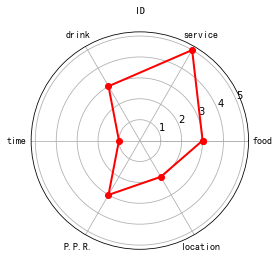

None


In [4]:
import numpy as np
import matplotlib.pyplot as plt

labels = np.array(['food','service','drink','time','P.P.R.','location'])

dataLenth = 6

data = np.array([3,5,3,1,3,2])
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
data = np.concatenate((data, [data[0]])) 
angles = np.concatenate((angles, [angles[0]])) 
 
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, data, 'ro-', linewidth=2)
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
ax.set_title("ID", va='bottom', fontproperties="SimHei")
ax.grid(True)
print(plt.show())


In [62]:
lis

[['VobZRj98tDH7AaojYJD8Jg', 0.575, 0.3, 0.975, 0.0, 0.625, 1.425],
 ['dPrFp1cxaTeTe9cyL36NkA',
  1.225609756097561,
  1.1097560975609757,
  0.7560975609756098,
  0.47560975609756095,
  0.36585365853658536,
  1.329268292682927],
 ['xrBtePtFw32nYIPhgU7I8w', 0.0, 0.0, 1.75, 0.0, 1.125, 3.0],
 ['3K8mhHIuE88mkcgOqFVTwg',
  1.2058823529411764,
  0.47058823529411764,
  0.6102941176470589,
  0.11764705882352941,
  0.5808823529411765,
  1.5294117647058822],
 ['uGwwPkw2AEvKkVHiSufhzQ',
  2.369565217391304,
  0.41304347826086957,
  0.9239130434782609,
  1.0543478260869565,
  0.20652173913043478,
  1.9673913043478262],
 ['WUA2Rhlb43HBw9sT2R0wmg',
  1.0769230769230769,
  0.6346153846153846,
  0.7019230769230769,
  0.1778846153846154,
  0.2644230769230769,
  1.4951923076923077],
 ['BcW7Z9lPmOB_8eS2lEuOqQ',
  0.9547413793103449,
  0.3742816091954023,
  1.2816091954022988,
  0.6573275862068966,
  0.0653735632183908,
  2.6702586206896552],
 ['TUD3RUtNdKYh2UyQuYdR2A',
  2.085714285714286,
  0.2857142857